# Photobleach correction rationale and figures

---

### For best results, save a local copy to your machine, then upload the final versions
-> Needs to be tested on cluster

In [1]:
from tifffile import imread
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
from decode_lab_code.calcium_imaging import preprocessing_utils as pu
from decode_lab_code.utils import indexing_tools as idx_tools

CaImAn toolbox not loaded. Add to environment if running calcium imaging analysis


In [2]:
# batch_to_tif
batch_convert = False

if batch_convert:
    files_path = r'/Volumes/decode/Manny/Optimizing Parameters'
    image_idx = 1
    downsample_factor = 4
    save_path = r'/Users/js0403/Manny Movies'
    dir_contents = sorted(os.listdir(files_path))
    #print(dir_contents)

    # convert all files
    pu.batch_to_tif(files_path = files_path, image_idx = image_idx, 
                        downsample_factor = downsample_factor, 
                        save_path = save_path)

# Here, I took the mean over all pixels for each time point, then correlated pixel average over time

In [3]:
fname = r'/Users/js0403/Manny Movies'
dir_contents = sorted(os.listdir(fname))
dir_contents = [i for i in dir_contents if '.tif' in i]

r = []; p = []; num_samples = []; y = []
for diri in dir_contents:
    file_read = os.path.join(fname,diri)
    movie = imread(file_read)
    y = []
    for t in range(movie.shape[0]):

        # take mean over all pixels
        y.append(float(np.mean(movie[t,:,:].flatten())))
        
    # collect number of time points
    num_samples.append(movie.shape[0])
    y = np.array(y)
    x = np.linspace(0,len(y),len(y))

    # pearson correlation
    r_out,p_out = pearsonr(x,y)    
    r.append(r_out)


Text(0.5, 0, 'Movie #')

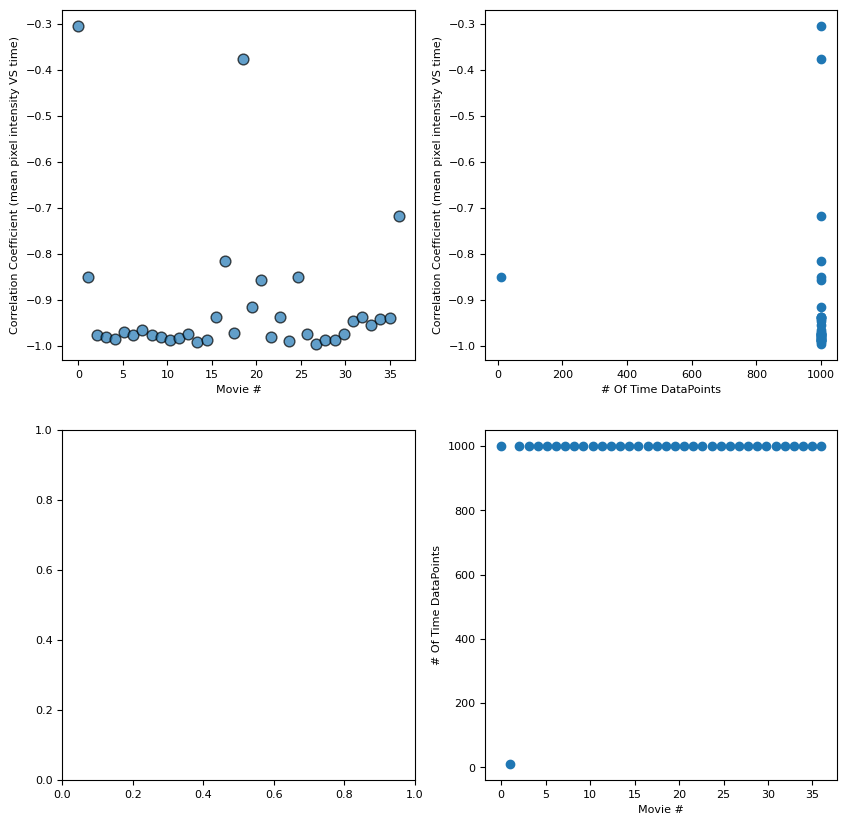

In [4]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

x = np.linspace(0,len(r),len(r))
ax[0,0].scatter(x, r, s=60, alpha=0.7, edgecolors="k")
ax[0,0].set_ylabel("Correlation Coefficient (mean pixel intensity VS time)")
ax[0,0].set_xlabel("Movie #")

ax[0,1].scatter(num_samples,r)
ax[0,1].set_ylabel("Correlation Coefficient (mean pixel intensity VS time)")
ax[0,1].set_xlabel("# Of Time DataPoints")

x = np.linspace(0,len(r),len(r))
ax[1,1].scatter(x,num_samples)
ax[1,1].set_ylabel("# Of Time DataPoints")
ax[1,1].set_xlabel("Movie #")


In [9]:
# Sort the .tif files in the movie by the correlation coefficient representation the photobleaching effect
sorted_dir, idx = idx_tools.sortx2y(x=dir_contents,y=r)
sorted_dir

['c57-b6-well1_astrocyte_movie5.tif',
 'WSB_well2_B3_movie7_astrocyte_1500uL_0.tif',
 'c57-b6-well1_astrocyte_movie3_int.tif',
 'WSB_well2_B3_movie4_astrocyte_1500uL_0.tif',
 'c57-b6-well1_astrocyte_movie5_int.tif',
 'c57-b6-well1_astrocyte_movie6.tif',
 'WSB_well2_B3_movie8_astrocyte_1500uL_0.tif',
 'WSB_well1_A3_movie4_astrocyte_1000uL_0.tif',
 'WSB_well2_B3_movie5_astrocyte_1500uL_0.tif',
 'WSB_well1_A3_movie2_astrocyte_500uL_0.tif',
 'WSB_well2_B3_movie3_astrocyte_1500uL_0.tif',
 'c57-b6-well1_astrocyte_movie2_int.tif',
 'WSB_well1_A3_movie2_astrocyte_1000uL_0.tif',
 'WSB_well2_B3_movie10_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie2_astrocyte_1500uL_0.tif',
 'c57-b6-well1_astrocyte_movie7.tif',
 'WSB_well2_B3_movie6_astrocyte_1500uL_0.tif',
 'c57-b6-well1_astrocyte_movie4_int.tif',
 'c57-b6-well1_astrocyte_movie10.tif',
 'WSB_well1_A3_movie5_astrocyte_1000uL_0.tif',
 'WSB_well2_B3_movie1_astrocyte_1500uL_0.tif',
 'c57-b6-well2_astrocyte_movie1_0.tif',
 'c57-b6-well1_astrocyte_mov

In [22]:
data = []
for i in range(len(dir_contents)):
    data.append([dir_contents[i],r[i]])

df = pd.DataFrame(data, columns=['filename','Pearsons R (pixel intensity VS time)'])
#df.set_index('Pearsons R (pixel intensity VS time)')
df = df.sort_values('Pearsons R (pixel intensity VS time)')
df

,filename,Pearsons R (pixel intensity VS time)
26,c57-b6-well1_astrocyte_movie5.tif,-0.996077
13,WSB_well2_B3_movie7_astrocyte_1500uL_0.tif,-0.991575
23,c57-b6-well1_astrocyte_movie3_int.tif,-0.989306
10,WSB_well2_B3_movie4_astrocyte_1500uL_0.tif,-0.988092
27,c57-b6-well1_astrocyte_movie5_int.tif,-0.987802
28,c57-b6-well1_astrocyte_movie6.tif,-0.987619
14,WSB_well2_B3_movie8_astrocyte_1500uL_0.tif,-0.987001
4,WSB_well1_A3_movie4_astrocyte_1000uL_0.tif,-0.984621
11,WSB_well2_B3_movie5_astrocyte_1500uL_0.tif,-0.983793
3,WSB_well1_A3_movie2_astrocyte_500uL_0.tif,-0.981255


# Here I took the first pixel and performed a correlation

In [9]:
fname = r'/Users/js0403/Manny Movies'
dir_contents = sorted(os.listdir(fname))
dir_contents = [i for i in dir_contents if '.tif' in i]

r = []; p = []
for diri in dir_contents:
    file_read = os.path.join(fname,diri)
    y = imread(file_read)
    rt=[]
    for t in range(len(y.shape[0])):
        x = np.linspace(0,len(y),len(y))

        # pearson correlation
        r_out,p_out = pearsonr(x,y)
        rt.append(r_out)

    r.append(np.mean(np.array(r_out)))
    #p.append(p_out)

    '''
    # fit a linear regression line to the data
    b, a = np.polyfit(x, y, deg=1)

    fig, ax = plt.subplots(nrows=1,ncols = 2)
    ax[0].imshow(imread(fname)[0,:,:])
    ax[1].scatter(x,y)
    ax[1].plot(x, a + b * x, color="r", lw=2.5)
    '''
#plt.bar(r)

/Users/js0403/anaconda3/envs/decode_lab_env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


0.017984395382555675

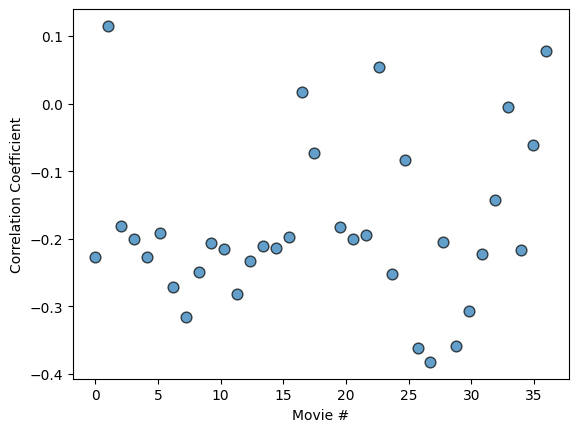

In [10]:
x = np.linspace(0,len(r),len(r))
y = r
plt.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Movie #")


In [20]:
import pandas as pd
counter = 0
data = list()
for i in dir_contents:
    data.append([str(i),r[counter]])
    counter += 1
df=pd.DataFrame(data,columns=['File','Pearsons R'])

In [21]:
df

,File,Pearsons R
0,A2_Test_well_nocells_movie1.tif,-0.227387
1,WSB_well1_A3_movie1_astrocyte_1000uL_0.tif,0.115045
2,WSB_well1_A3_movie2_astrocyte_1000uL_0.tif,-0.180866
3,WSB_well1_A3_movie2_astrocyte_500uL_0.tif,-0.201007
4,WSB_well1_A3_movie4_astrocyte_1000uL_0.tif,-0.226885
5,WSB_well1_A3_movie5_astrocyte_1000uL_0.tif,-0.191304
6,WSB_well2_B3_movie10_astrocyte_1500uL_0.tif,-0.271833
7,WSB_well2_B3_movie1_astrocyte_1500uL_0.tif,-0.315256
8,WSB_well2_B3_movie2_astrocyte_1500uL_0.tif,-0.248918
9,WSB_well2_B3_movie3_astrocyte_1500uL_0.tif,-0.205588


In [11]:
dir_contents

['A2_Test_well_nocells_movie1.tif',
 'WSB_well1_A3_movie1_astrocyte_1000uL_0.tif',
 'WSB_well1_A3_movie2_astrocyte_1000uL_0.tif',
 'WSB_well1_A3_movie2_astrocyte_500uL_0.tif',
 'WSB_well1_A3_movie4_astrocyte_1000uL_0.tif',
 'WSB_well1_A3_movie5_astrocyte_1000uL_0.tif',
 'WSB_well2_B3_movie10_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie1_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie2_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie3_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie4_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie5_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie6_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie7_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie8_astrocyte_1500uL_0.tif',
 'WSB_well2_B3_movie9_astrocyte_1500uL_0.tif',
 'c57-b6-well1_astrocyte_movie1.tif',
 'c57-b6-well1_astrocyte_movie10.tif',
 'c57-b6-well1_astrocyte_movie1_cmg.tif',
 'c57-b6-well1_astrocyte_movie1_int.tif',
 'c57-b6-well1_astrocyte_movie2.tif',
 'c57-b6-well1_astrocyte_movie2_int.tif',
 'c57-b6-well1_ast

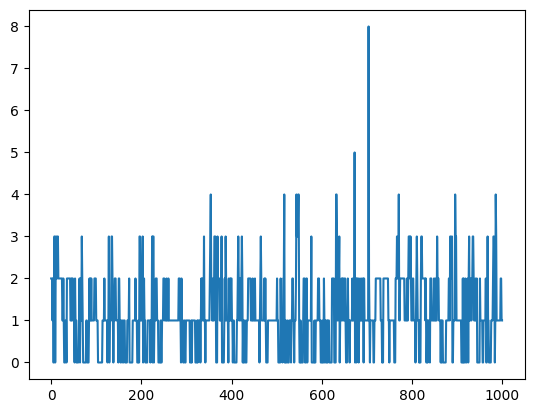

In [40]:
for i in range(len(dir_contents)):
    if i == 16:
        file_read = os.path.join(fname,diri)
        y = imread(file_read)
plt.plot(y[:,0,0])


Reading /Users/js0403/Manny Movies/WSB_well1_A3_movie5_astrocyte_1000uL_0.tif


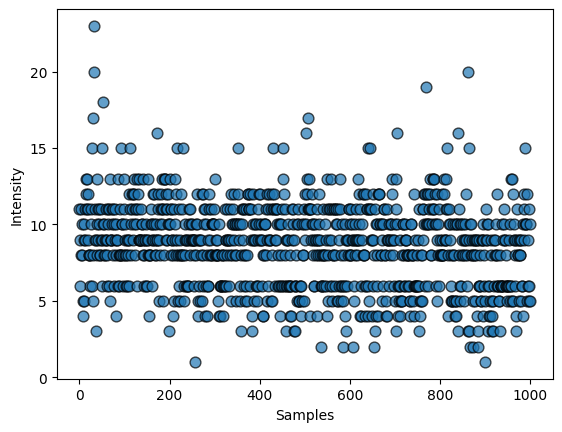

Create a figure (x axis is movie, y-axis is correlation coefficient)

Text(0.5, 0, 'Time (samples)')

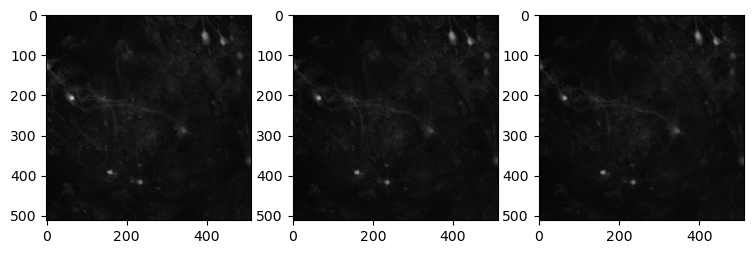

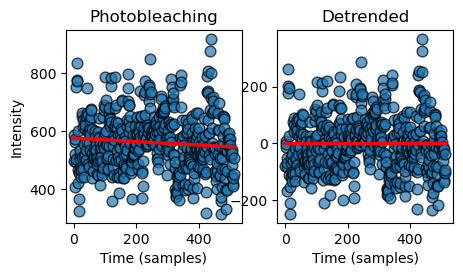

In [12]:
fname = r'/Users/js0403/ophysdata/Trevor_data/Neuron/750K2_200ms_4XSum_video_RedGreen_depolar002_neuron.tif'
#fname = r'/Users/js0403/ophysdata/Trevor_data/750K1_200ms_video_RedGreen003.tif'

# load movie
movie_orig = tifffile.memmap(fname)
movie_orig.shape

if len(movie_orig.shape)>3:
    movie_orig = movie_orig[:,1,:,:]
    
# figure subplots
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(9,18))

# define vmin and max
vmin = np.min(movie_orig[0,:,:])
vmax = np.max(movie_orig[0,:,:])

# mid and end point
mid_idx = round(movie_orig.shape[0]/2)
end_idx = movie_orig.shape[0]-1

# scale data
ax[0].imshow(movie_orig[0,:,:],cmap='gray',vmin=vmin,vmax=vmax)
ax[1].imshow(movie_orig[mid_idx,:,:],cmap='gray',vmin=vmin,vmax=vmax)
ax[2].imshow(movie_orig[end_idx,:,:],cmap='gray',vmin=vmin,vmax=vmax)

# save fig
root_dir = os.path.split(fname)[0]

# example data
ex_pixel = movie_orig[:,400,400]
x = np.linspace(0,len(ex_pixel),len(ex_pixel))
y = ex_pixel

# plot data
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize = (5, 2.5))
ax2[0].scatter(x,y, s=60, alpha=0.7, edgecolors="k")
ax2[0].set_title("Photobleaching")
ax2[0].set_ylabel("Intensity")
ax2[0].set_xlabel("Time (samples)")

# fit a linear regression line to the data
b, a = np.polyfit(x, y, deg=1)

# Plot regression line
ax2[0].plot(x, a + b * x, color="r", lw=2.5)

from scipy.signal import detrend
detrended = detrend(y, type='linear')
b, a = np.polyfit(x, detrended, deg=1)

ax2[1].scatter(x, detrended, s=60, alpha=0.7, edgecolors="k")
ax2[1].plot(x, a + b * x, color="r", lw=2.5)

ax2[1].set_title("Detrended")
ax2[1].set_xlabel("Time (samples)")